In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [33]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [34]:
len(X_train)


60000

In [35]:
len(X_test)


10000

In [36]:
X_train[0].shape



(28, 28)

In [24]:
X_train[0]


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

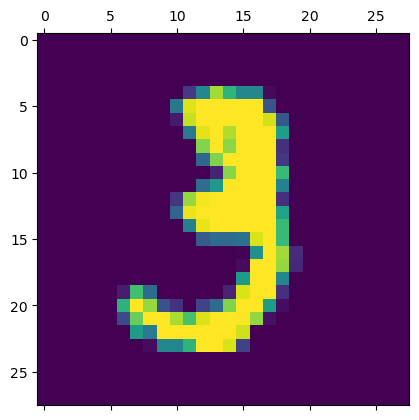

In [37]:
plt.matshow(X_train[10])


In [38]:
y_train[0]

5

In [39]:
X_train = X_train / 255
X_test = X_test / 255

In [40]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [41]:
X_train_flattened.shape

(60000, 784)

In [42]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [44]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4696 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2826 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2728 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9250


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1870 - accuracy: 0.8202


[1.1870418787002563, 0.8202000260353088]

In [45]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 3s 3ms/step


array([2.0362342e-02, 1.9566730e-07, 5.4179154e-02, 9.2669976e-01,
       1.7260342e-03, 8.7612614e-02, 1.4468392e-06, 9.9981302e-01,
       1.1246852e-01, 6.3264245e-01], dtype=float32)

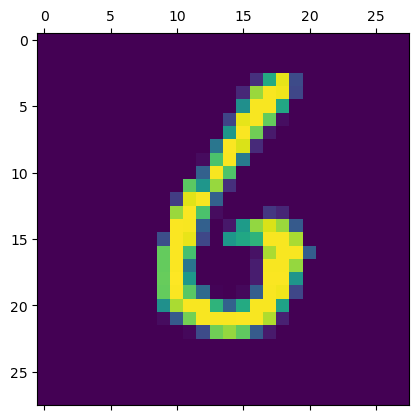

In [51]:
plt.matshow(X_test[50])

In [56]:
y_predicted = model.predict(X_test_flattened)
y_predicted[50]

313/313 [==============================] - 1s 2ms/step


array([6.76450968e-01, 1.50798260e-05, 1.60562560e-01, 1.09937035e-01,
       5.83627680e-03, 7.61155427e-01, 9.98912990e-01, 3.83667202e-06,
       7.06650242e-02, 8.61628214e-04], dtype=float32)

In [57]:
np.argmax(y_predicted[50])

6

In [58]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [59]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [60]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    6,    8,    3,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    9,  916,   18,    7,    5,   13,   12,   44,    2],
       [   2,    0,   14,  916,    0,   23,    4,   15,   29,    7],
       [   1,    1,    2,    1,  909,    0,   15,    4,   10,   39],
       [   8,    2,    1,   25,   10,  776,   19,    9,   35,    7],
       [   7,    3,    2,    1,    7,    9,  925,    2,    2,    0],
       [   1,    5,   23,    3,    3,    0,    0,  964,    3,   26],
       [   4,    8,    5,   15,    8,   20,   11,   13,  883,    7],
       [  10,    5,    1,    9,   25,    6,    0,   30,   11,  912]])>

Text(95.72222222222221, 0.5, 'Truth')

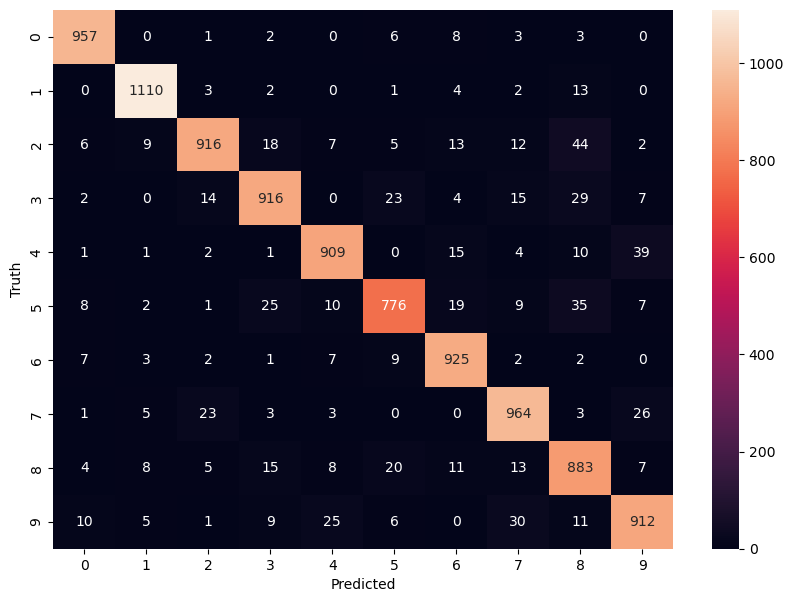

In [61]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer

In [62]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2699 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1178 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0818 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0627 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0485 - accuracy: 0.9851


In [63]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0864 - accuracy: 0.9755


[0.08639522641897202, 0.9754999876022339]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

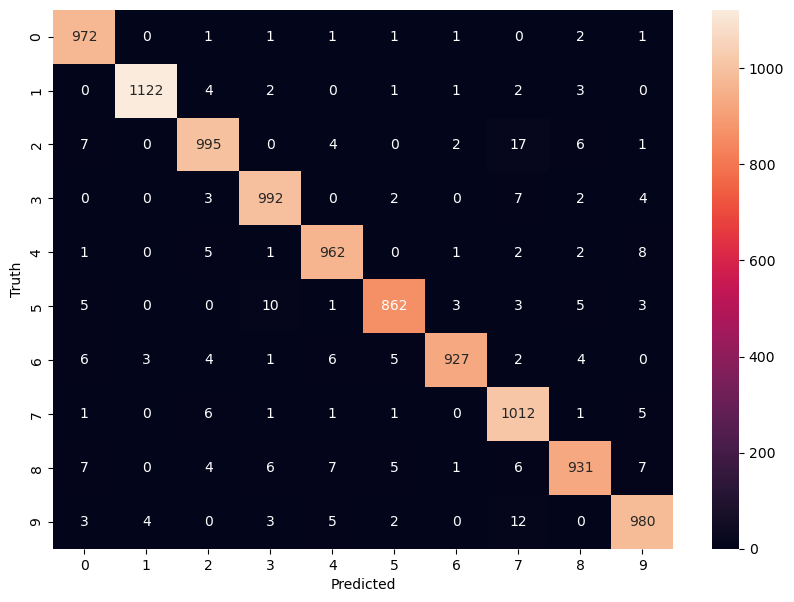

In [64]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset